# Andrea Ramirez and Tia Merheb

# Final Project

# 19 May 2022

In [530]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [531]:
house = pd.read_csv("Downloads/Dataset 2 (House Sales)/house_sales.csv")
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Imported house.csv data set and displayed the first 5 rows.

# Handling missing data

In [532]:
#finding number of null values
house.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [533]:
#finding column types
house.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [534]:
#Taking out all the Null values that are not of object type
#and replacing it with the median of that column.
house['bedrooms'] = house['bedrooms'].fillna(house['bedrooms'].median())
house['bathrooms'] = house['bathrooms'].fillna(house['bathrooms'].median())
house['sqft_living'] = house['sqft_living'].fillna(house['sqft_living'].median())
house['sqft_lot'] = house['sqft_lot'].fillna(house['sqft_lot'].median())

house.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We begin to handle missing data by dropping and replacing the null values with the median in order to avoid creating outliers. 

# Handling Outliers

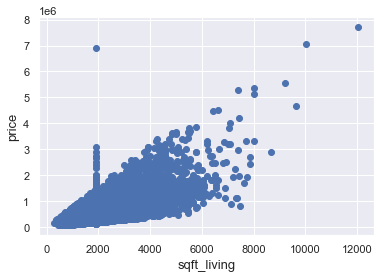

In [535]:
#Provide visual representation of outliers in the data
fig, ax = plt.subplots()
ax.scatter(x = house['sqft_living'], y = house['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('sqft_living', fontsize=13)
plt.show()

In [536]:
#Deleting outliers
house = house.drop(house[(house['sqft_living']>10000) & (house['price']>700000)].index)


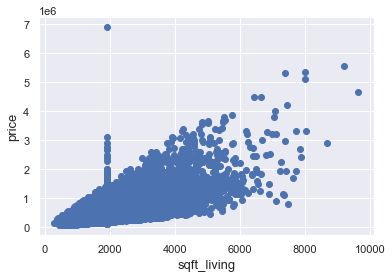

In [537]:
fig, ax = plt.subplots()
ax.scatter(x = house['sqft_living'], y = house['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('sqft_living', fontsize=13)
plt.show()


 mu = 539455.02 and sigma = 361175.23



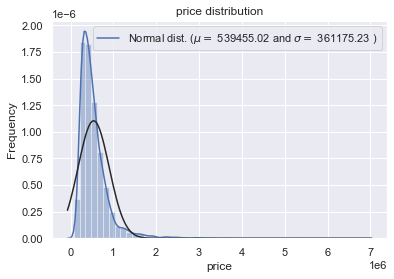

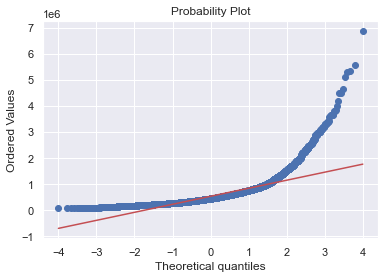

In [538]:
sns.distplot(house['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(house['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = probplot(house['price'], plot=plt)
plt.show()


 mu = 13.05 and sigma = 0.53



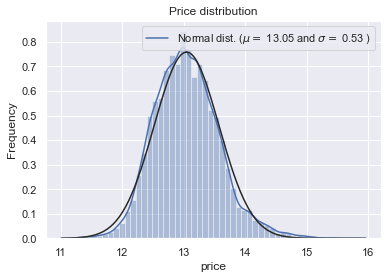

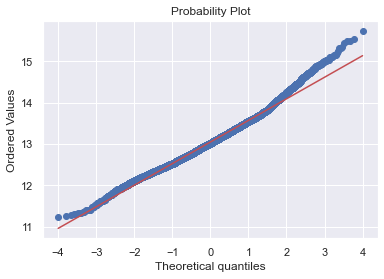

In [539]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
house["price"] = np.log1p(house["price"])

#Check the new distribution 
sns.distplot(house['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(house['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = probplot(house['price'], plot=plt)
plt.show()

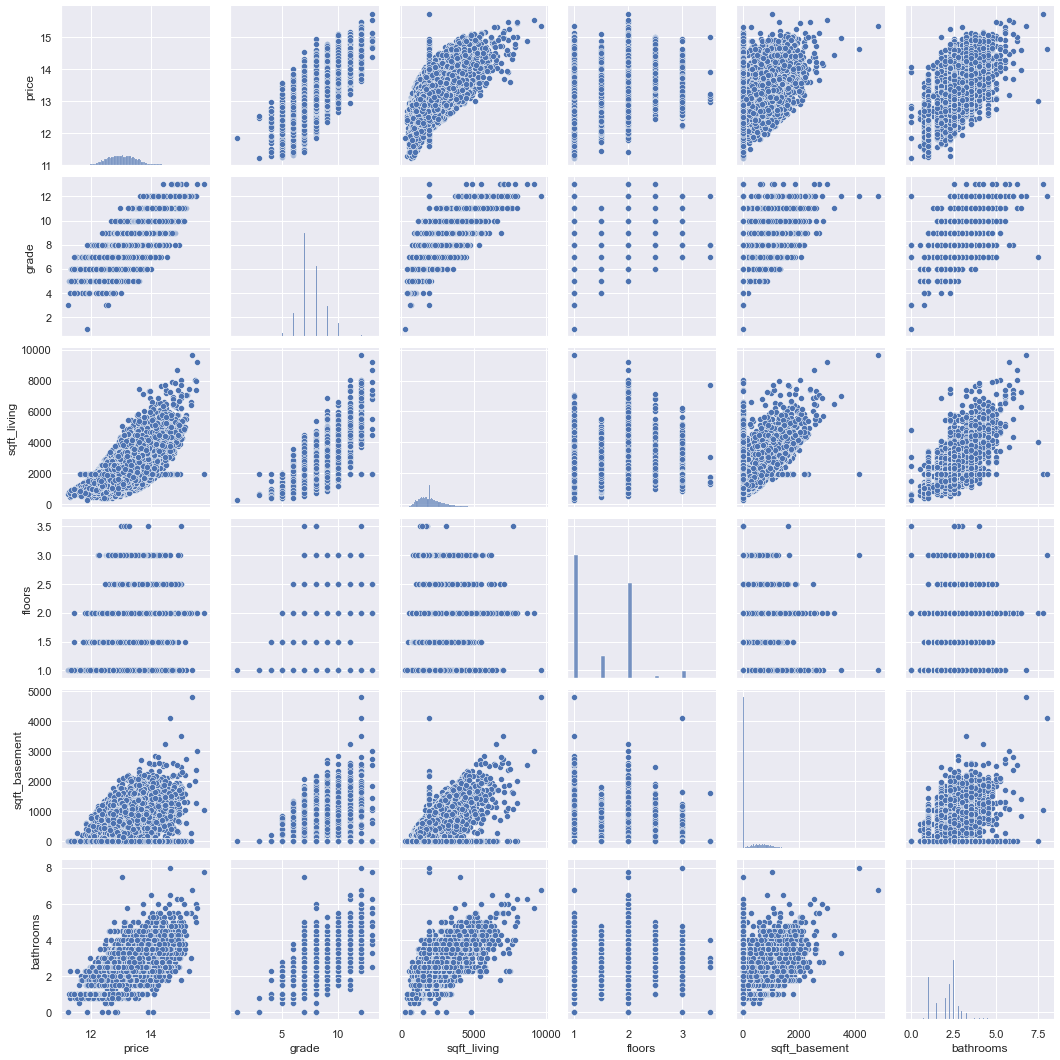

In [540]:
sns.set()
cols = ['price', 'grade', 'sqft_living', 'floors', 'sqft_basement', 'bathrooms', 'date']
sns.pairplot(house[cols], size = 2.5)
plt.show();

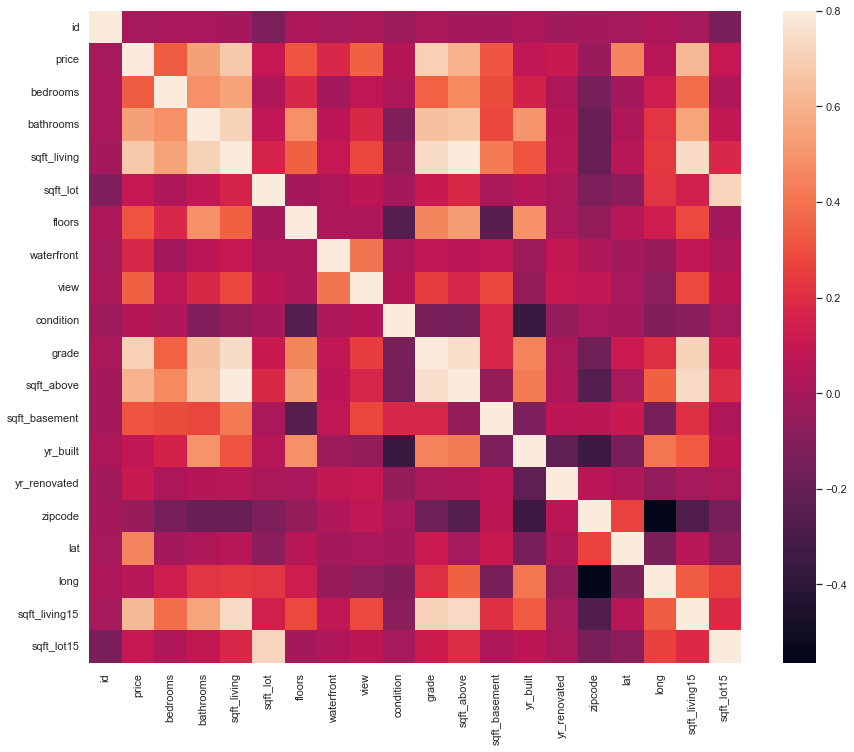

In [541]:
corrmat = house.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

In [542]:
#Year and month sold are transformed into categorical features.
house['yr_built'] = house['yr_built'].astype(str)
house['yr_renovated'] = house['yr_renovated'].astype(str)

In [543]:
house['sqft_total'] = house['sqft_above'] + house['sqft_basement']

In [544]:
cols = ('date','price','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated')


In [545]:
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(house[c].values)) 
    house[c] = lbl.transform(list(house[c].values))

# shape        
print('Shape house: {}'.format(house.shape))

Shape house: (21611, 22)


In [546]:
numeric_feats = house.dtypes[house.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = house[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
sqft_lot,13.196491
waterfront,11.419667
sqft_lot15,9.505840
yr_renovated,5.048638
view,3.397759
sqft_basement,1.565407
sqft_above,1.418102
sqft_total,1.403515
sqft_living,1.371628
sqft_living15,1.107958


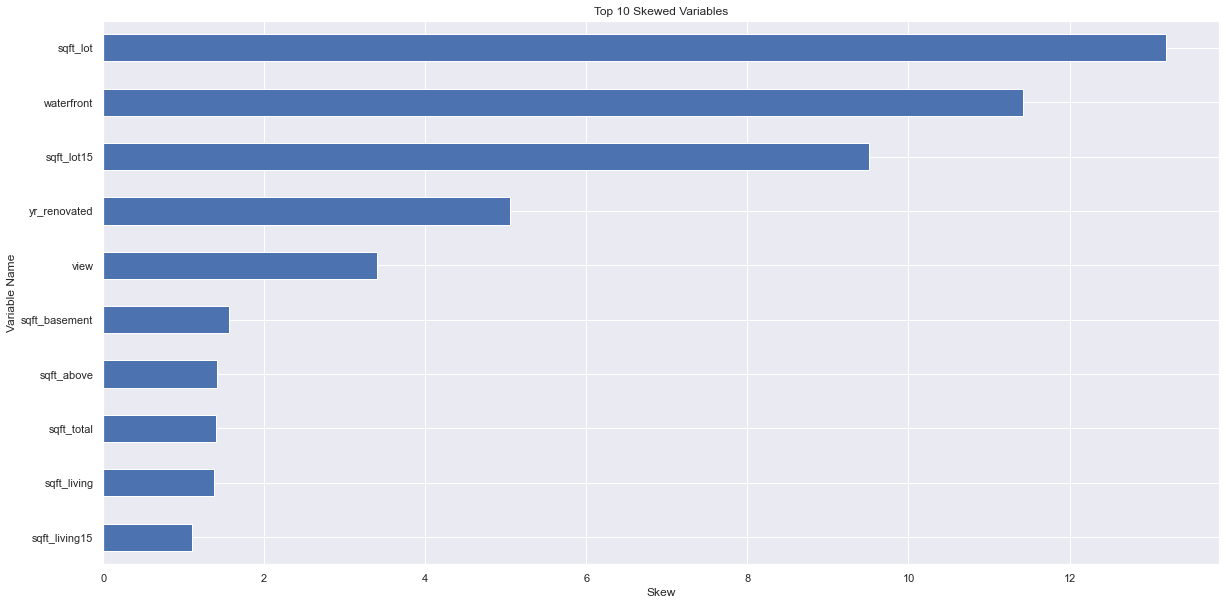

In [547]:
skewness['Skew'].head(10).plot(kind='barh', figsize = (20,10)).invert_yaxis() #top 10 missing columns
plt.xlabel("Skew")
plt.ylabel("Variable Name")
plt.title("Top 10 Skewed Variables")
plt.show()

In [548]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform (normalize)".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    if feat == 'long':
        house[feat] = house[feat]
    else:
        house[feat] = boxcox1p(house[feat], lam)

SyntaxError: invalid non-printable character U+00A0 (3348208731.py, line 7)

In [549]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total
0,7129300520,164,349,3,3,1180.0,5650.0,0,0,0,2,5,1180,0,55,0,98178,47.5112,-122.257,1340,5650,1180
1,6414100192,220,2091,3,8,2570.0,7242.0,2,0,0,2,5,2170,400,51,45,98125,47.7210,-122.319,1690,7639,2570
2,5631500400,290,180,2,3,770.0,10000.0,0,0,0,2,4,770,0,33,0,98028,47.7379,-122.233,2720,8062,770
3,2487200875,220,2373,4,11,1960.0,5000.0,0,0,0,4,5,1050,910,65,0,98136,47.5208,-122.393,1360,5000,1960
4,1954400510,283,1967,3,7,1680.0,8080.0,0,0,0,2,6,1680,0,87,0,98074,47.6168,-122.045,1800,7503,1680


In [550]:
house = pd.get_dummies(house)
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total
0,7129300520,164,349,3,3,1180.0,5650.0,0,0,0,2,5,1180,0,55,0,98178,47.5112,-122.257,1340,5650,1180
1,6414100192,220,2091,3,8,2570.0,7242.0,2,0,0,2,5,2170,400,51,45,98125,47.7210,-122.319,1690,7639,2570
2,5631500400,290,180,2,3,770.0,10000.0,0,0,0,2,4,770,0,33,0,98028,47.7379,-122.233,2720,8062,770
3,2487200875,220,2373,4,11,1960.0,5000.0,0,0,0,4,5,1050,910,65,0,98136,47.5208,-122.393,1360,5000,1960
4,1954400510,283,1967,3,7,1680.0,8080.0,0,0,0,2,6,1680,0,87,0,98074,47.6168,-122.045,1800,7503,1680


# Data analytics

In [551]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb
import lightgbm as lgb

In [552]:
#house['long'] = house['long'].fillna(house['long'].median())
#house.isnull().sum()
#drop variables that are not valuable to our goal
house = house.dropna(subset = ['long', 'lat', 'sqft_living15', 'sqft_lot15'])

house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_total       0
dtype: int64

In [553]:
X = house.iloc[:,[2,3,4,5,6,7,8,9,10,11]] #id
Y = house.iloc[:] #price

In [554]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2, random_state=0)

In [555]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_total       0
dtype: int64

In [557]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)

In [558]:
train = house[house.columns.difference(['id', 'price'])]

In [559]:
#Validation function
n_folds = 5

def rmse_cv(model,n_folds):
    kf=KFold(n_splits=n_folds)
    rmse = np.sqrt(-cross_val_score(model, train, house.price, scoring="neg_mean_squared_error", cv = kf))
    return rmse

In [560]:
neigh = KNeighborsRegressor(n_neighbors=10)

In [561]:
dt = DecisionTreeRegressor(max_depth = 10)

In [562]:
model_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01)

In [563]:
model_lgb = lgb.LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000)

In [564]:
score_neigh = rmse_cv(neigh,n_folds)
print("Nearest Neighbor (13) score: {:.4f} ({:.4f})\n".format(score_neigh.mean(), score_neigh.std()))

Nearest Neighbor (13) score: 700.0628 (9.1606)



In [576]:
score_rf = rmse_cv(rf,n_folds)
print("Random Forest Regression score: {:.4f} ({:.4f})\n".format(score_rf.mean(), score_rf.std()))

Random Forest Regression score: 319.6693 (5.6599)



In [577]:
score_xg = rmse_cv(model_xgb,n_folds)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score_xg.mean(), score_xg.std()))

Xgboost score: 309.9031 (4.1245)



In [578]:
score_lgbm = rmse_cv(model_lgb,n_folds)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score_lgbm.mean(), score_lgbm.std()))

LGBM score: 310.0891 (3.6361)



In [584]:
data = {'XGBoost':[score_xg.mean(),score_xg.std()], 'Random Forest': [score_rf.mean(),score_rf.std()]
        , 'LightGBM': [score_lgbm.mean(),score_lgbm.std()],'Nearest Neighbor': [score_neigh.mean(),score_neigh.std()]}
data_df = pd.DataFrame(data=data).T.reset_index().sort_values(by = [0],ascending = True)
data_df.columns = ['Algorithm','RMSE','STD']

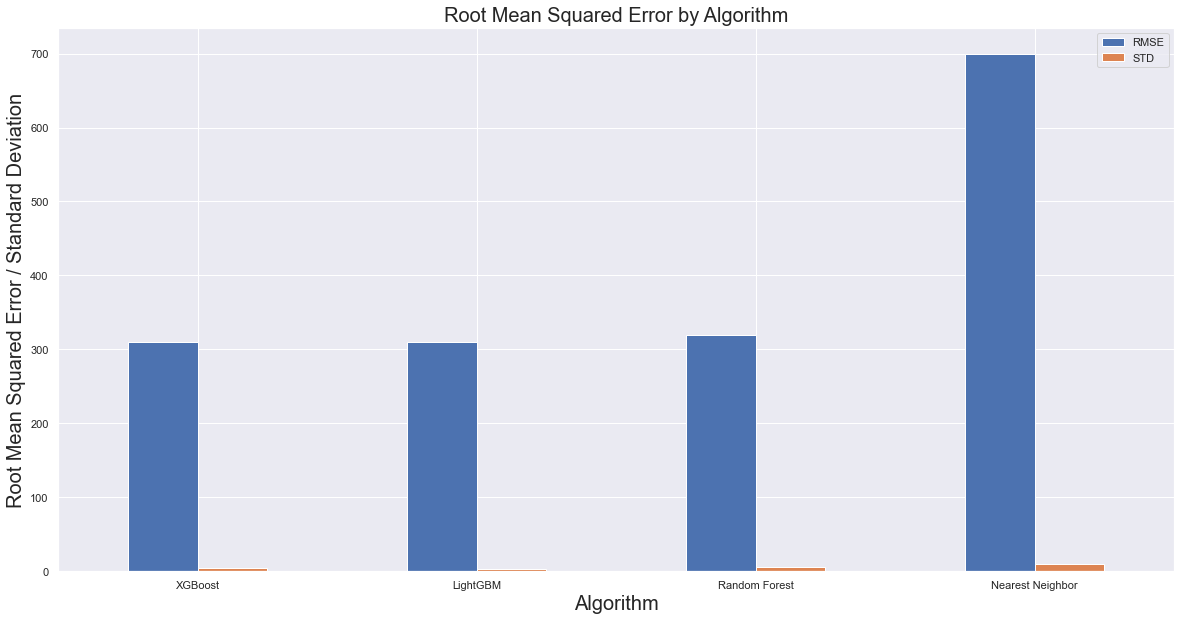

In [585]:
# creating the bar plot
data_df.plot(kind='bar',x = 'Algorithm', y = ['RMSE', 'STD'], figsize = (20,10), rot=0)
plt.xlabel("Algorithm",fontsize=20)
plt.ylabel("Root Mean Squared Error / Standard Deviation",fontsize=20)
plt.title("Root Mean Squared Error by Algorithm",fontsize=20)
plt.show()

# Variable Importance Plot

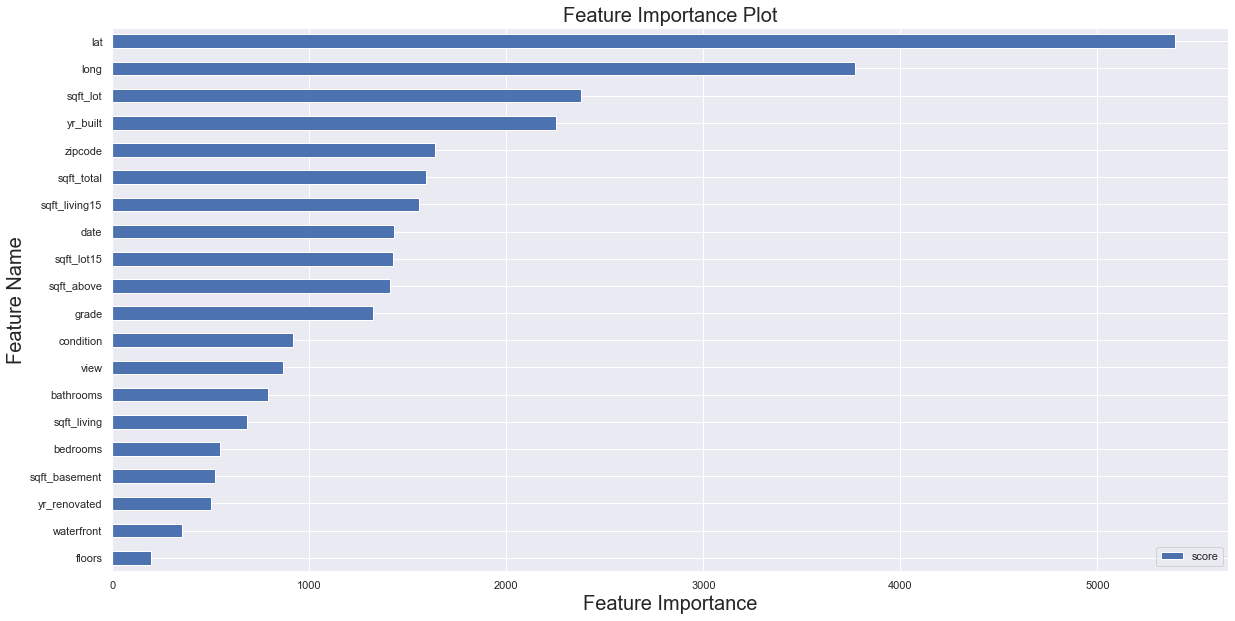

In [586]:
model = model_xgb.fit(train, house.price) #fit model on entire dataset to get variable importance since we fit it on each fold
feature_important = model.get_booster().get_score(importance_type='weight')

keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:20].plot(kind='barh', figsize = (20,10)).invert_yaxis(); ## plot top 20 features
plt.xlabel("Feature Importance",fontsize=20)
plt.ylabel("Feature Name",fontsize=20)
plt.title("Feature Importance Plot",fontsize=20)
plt.show()